In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\dhruvin\AppData\Local\Temp\ipykernel_15904\3363060608.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Loading dataset in pandas dataframe
wine_dataset = pd.read_csv('winequality-red.csv')

In [3]:
#Checking rows and columns
wine_dataset.shape

(1599, 12)

In [4]:
#First 5 example from dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Checking dataset for null values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and Visualization

In [6]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


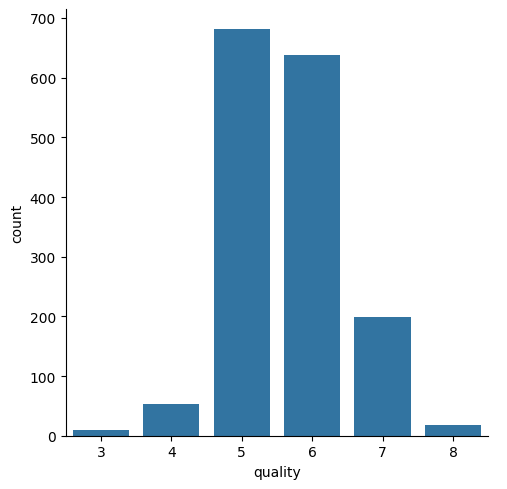

In [7]:
# number of values for each quality
sns.catplot(x='quality',data=wine_dataset,kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

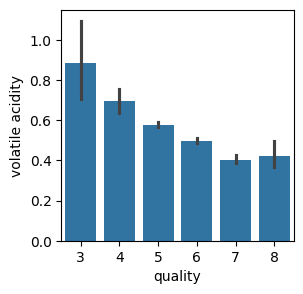

In [8]:
#volatile acidity v/s quality
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='volatile acidity',data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

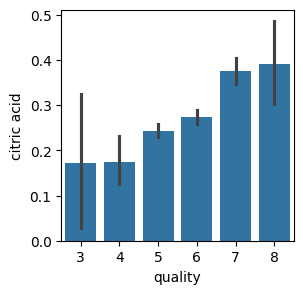

In [9]:
#citric acid v/s quality
plot = plt.figure(figsize=(3,3))
sns.barplot(x='quality',y='citric acid',data=wine_dataset)

### Correlation
 1. Positive correlation
 2. Negative correlation

In [10]:
correlation = wine_dataset.corr()

<Axes: >

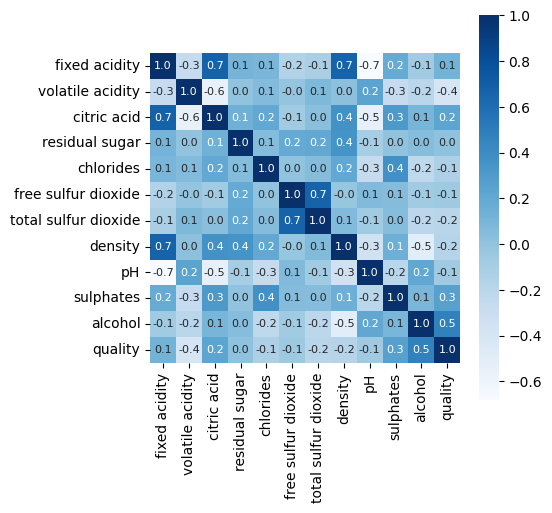

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

### Data Pre-processing

In [15]:
#seperating data and label
X=wine_dataset.drop(columns='quality',axis=1)
Y=wine_dataset['quality']

In [17]:
print(wine_dataset.shape)
print(X.shape)
print(Y.shape)

(1599, 12)
(1599, 11)
(1599,)


In [21]:
#Label Binarization
#if quality value is 7 or above than convert it to 1(good wine) else 0(bad wine)
Y=Y.apply(lambda y_value:1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [24]:
#Spliting training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [25]:
print(Y.shape,Y_train.shape,Y_test.shape)

(1599,) (1279,) (320,)


# Model Training: Random Forest Classifier

In [26]:
model = RandomForestClassifier()

In [27]:
model.fit(X_train,Y_train)

RandomForestClassifier()

### Model Evaluation

In [30]:
#Evaluation on training data
training_data_prediction=model.predict(X_train)
accuracy_score_on_training = accuracy_score(training_data_prediction,Y_train)

In [34]:
print(accuracy_score_on_training*100)

100.0


In [36]:
#Accuracy on testing data
test_data_prediction = model.predict(X_test)
accuracy_score_on_test = accuracy_score(test_data_prediction,Y_test)

In [37]:
print(accuracy_score_on_test)

0.9125


### Building Predictive system

In [42]:
input_data = (6.7,0.16,0.64,2.1,0.059000000000000004,24.0,52.0,0.9949399999999999,3.34,0.71,11.2)
input_data_numpy_array = np.array(input_data)

#reshape the data as we are predictive the label for only one instance
input_data_reshaped = input_data_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if prediction==1:
    print("Good Quality Wine")
else:
    print("Bad Quality wine")

Bad Quality wine


C:\Users\dhruvin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
